# Examen Parcial

## Tokenizer

In [ ]:
import re
from typing import List
import collections
import numpy as np

#INPUT -> List[Str] (lista de textos en el corpus)
#OUTPUT -> List[List[Str] (tokens por cada texto en el corpus)]
class Tokenizer:
  def __init__(self):
    """
    Inicializa el tokenizador con un vocabulario vacío y una lista vacía de tokens.
    Se predefinen stopwords para eliminar del corpus
    """
    self.tokens = []
    self.vocab = collections.Counter()
    self.stopwords = [
    # Stopwords en español
    "a", "al", "algo", "algunos", "ante", "antes", "como", "con", "contra", "cual", "cuando",
    "de", "del", "desde", "donde", "durante", "e", "el", "ella", "ellas", "ellos", "en",
    "entre", "era", "erais", "eran", "eras", "eres", "es", "esa", "esas", "ese", "eso",
    "esos", "esta", "estaba", "estado", "estáis", "estamos", "están", "estar", "estas",
    "este", "esto", "estos", "estoy", "etc", "fue", "fueron", "fui", "fuimos", "ha", "había",
    "habéis", "habíamos", "hace", "hacemos", "hacen", "hacer", "haces", "hago", "han",
    "has", "hasta", "hay", "he", "la", "las", "le", "les", "lo", "los", "me", "mi", "mis",
    "mucho", "muy", "nada", "ni", "no", "nos", "nosotros", "nuestra", "nuestro", "o", "os",
    "otra", "otro", "para", "pero", "poco", "por", "porque", "qué", "que", "quien",
    "quienes", "se", "si", "sin", "sobre", "sois", "solamente", "solo", "son", "su",
    "sus", "también", "tanto", "te", "tenemos", "tengo", "ti", "tienen", "toda",
    "todas", "todo", "todos", "tu", "tus", "un", "una", "unas", "uno", "unos", "vosotros",
    "vuestra", "vuestro", "ya", "yo",

    # Stopwords en inglés
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any",
    "are", "aren't", "as", "at", "be", "because", "been", "before", "being", "below",
    "between", "both", "but", "by", "can", "can't", "cannot", "could", "couldn't", "did",
    "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", "each", "few",
    "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having",
    "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself",
    "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't",
    "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself",
    "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our",
    "ours", "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll",
    "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's", "the",
    "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they",
    "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too",
    "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've",
    "were", "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while",
    "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd",
    "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"
    ]


  def tokenize(self, corpus: List[str], min_freq=1):
    """
    Función que tokeniza el corpus y obtiene el vocabulario conjunto de cada documento
    Retorna:
        List[List[Str] (tokens por cada texto en el corpus)]
    """

    tokens = []
    for text in corpus:
      text = re.sub(r'http[s]*?:\/\/\S+|\[http[^\]]+\]', "<URL>", text)    #URLs
      text = re.sub(r'(?:[A-Z]\.)+', "<ACRONYM>", text)

      text = re.sub(r'\S*\d\S*', '<NUM>', text)      # Números con decimales opcionales y %

      text = re.sub(r'[\]\[\,\;\"\'\?\(\)\:\-\_\`]', "", text)
      text = re.sub(r'[^\w<>]', ' ', text)
      text = [word for word in text.lower().split() if word not in self.stopwords]
      tokens.append(text)
      self.vocab.update(text)

    tokens = [[word for word in text if self.vocab[word] >= min_freq] for text in tokens]
    self.vocab = collections.Counter({word: count for word, count in self.vocab.items() if count >= min_freq})

    self.tokens = tokens

    return tokens


Ejemplo de uso:

In [ ]:
textos = [
    "!!Visita nuestra web en https://www.ejemplo.com para más información.",
    # Tokens esperados: ['visita', 'nuestra', 'web', 'más', 'información']

    "La conferencia se realizará el 23 de octubre de 2024 a las 10:00 AM en la sala principal.",
    # Tokens esperados: ['conferencia', 'realizará', 'octubre', '2024', '10', 'am', 'sala', 'principal']

    "Python es un lenguaje de programación popular en el 2023. Su uso ha crecido un 30% en comparación con el año anterior.",
    # Tokens esperados: ['python', 'lenguaje', 'programación', 'popular', '2023', 'uso', 'crecido', '30', 'comparación', 'año', 'anterior']


    "NASA y SpaceX lanzaron una misión conjunta en 2022 para explorar Marte.",
    # Tokens esperados: ['nasa', 'spacex', 'lanzaron', 'misión', 'conjunta', '2022', 'explorar', 'marte']

    "El documento se puede descargar en PDF o DOC desde https://archivo.org/documento.pdf.",
    # Tokens esperados: ['documento', 'puede', 'descargar', 'pdf', 'doc']

    "Para más detalles, envía un correo a info@empresa.com o visita la sección de preguntas frecuentes (FAQ).",
    # Tokens esperados: ['detalles', 'envía', 'correo', 'visita', 'sección', 'preguntas', 'frecuentes', 'faq']

    "Las ventas aumentaron en un 15% durante el último trimestre del año pasado.",
    # Tokens esperados: ['ventas', 'aumentaron', '15', 'durante', 'último', 'trimestre', 'año', 'pasado']

    "En el 2020, la OMS declaró la pandemia de COVID-19.",
    # Tokens esperados: ['2020', 'oms', 'declaró', 'pandemia', 'covid', '19']
    "La moda de los 1990s y los relojes 10inch llegaron con fuerza, al igual que la carrera de 100m."
]

tokenizer = Tokenizer()
tokens = tokenizer.tokenize(textos, 1)
print(tokens)
print(tokenizer.vocab)
print(tokenizer.tokens)

[['visita', 'web', '<url>', 'más', 'información'], ['conferencia', 'realizará', '<num>', 'octubre', '<num>', '<num>', 'sala', 'principal'], ['python', 'lenguaje', 'programación', 'popular', '<num>', 'uso', 'crecido', '<num>', 'comparación', 'año', 'anterior'], ['nasa', 'y', 'spacex', 'lanzaron', 'misión', 'conjunta', '<num>', 'explorar', 'marte'], ['documento', 'puede', 'descargar', 'pdf', 'doc', '<url>'], ['más', 'detalles', 'envía', 'correo', 'info', 'empresa', 'com', 'visita', 'sección', 'preguntas', 'frecuentes', 'faq'], ['ventas', 'aumentaron', '<num>', 'último', 'trimestre', 'año', 'pasado'], ['<num>', 'oms', 'declaró', 'pandemia', '<num>'], ['moda', '<num>', 'y', 'relojes', '<num>', 'llegaron', 'fuerza', 'igual', 'carrera', '<num>']]
Counter({'<num>': 12, 'visita': 2, '<url>': 2, 'más': 2, 'año': 2, 'y': 2, 'web': 1, 'información': 1, 'conferencia': 1, 'realizará': 1, 'octubre': 1, 'sala': 1, 'principal': 1, 'python': 1, 'lenguaje': 1, 'programación': 1, 'popular': 1, 'uso': 1, 

## Pregunta 1

### Parte 1

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
import collections
from typing import List, Tuple, Dict


#Corpus de entrenamiento no tiene la palabra "is" dado que
#el vocabulario especificado en el enunciado no lo contiene
#y la probabilidad de ngramas conteniendo dicha palabra va a ser
#interpolada
corpus = [
    "all models are wrong",
    "a model wrong",
    "some models are useful"
]

test = [
    "all models are wrong",
    "a model is wrong",
    "some models are useful"
]


tokens = [text.split() for text in corpus]
# print(tokens)

# Implementación de modelos N-grama
class NGramModel:
    def __init__(self, n: int):
        self.n = n
        self.ngram_counts = collections.Counter()
        self.context_counts = collections.Counter()
        self.vocab = set()
        self.total_ngrams = 0

    def train(self, corpus: List[List[str]]):
        for document in corpus:
            if(self.n == 1):
                tokens = ['<s>'] + document + ['</s>']
            else:
                tokens = ['<s>'] * (self.n - 1) + document + ['</s>']
            # print(tokens
            self.vocab.update(tokens)
            for i in range(len(tokens) - self.n + 1):
                ngram = tuple(tokens[i:i + self.n])
                context = tuple(tokens[i:i + self.n - 1])
                self.ngram_counts[ngram] += 1
                self.context_counts[context] += 1
                self.total_ngrams += 1

    def get_ngram_prob(self, ngram: Tuple[str, ...], k=0) -> float:
        count = self.ngram_counts.get(ngram, 0)
        context = ngram[:-1]
        context_count = self.context_counts.get(context, 0)
        if context_count == 0:
            return 0.0
        else:
            return (count + k) / (context_count + k*self.total_ngrams)

    def get_sentence_probability(self, sentence: List[str], k=0) -> float:
        tokens = ['<s>'] * (self.n - 1) + sentence + ['</s>']
        probability = 1.0
        for i in range(len(tokens) - self.n + 1):
            ngram = tuple(tokens[i:i + self.n])
            prob = self.get_ngram_prob(ngram, k)
            print(f"P({ngram[-1]}|{ngram[:-1]}) = {prob}")
            if prob > 0:
                probability *= prob
            else:
                # Asignamos una pequeña probabilidad para evitar cero
                probability *= 1e-6
        return probability

bigram_model = NGramModel(n=2)
bigram_model.train(tokens)
print(bigram_model.vocab)

print("a) Probabilidades de bigramas SIN SUAVIZADO")
for text in test:
    prob = bigram_model.get_sentence_probability(text.split())
    print(f"Texto: {text}, P: {prob}")
print("-"*10)
print("b) Probabilidades de bigramas CON SUAVIZADO ADD-ONE")
for text in test:
    prob = bigram_model.get_sentence_probability(text.split(), 1)
    print(f"Texto: {text}, P: {prob}")

print("-"*10)
print("c) Probabilidades de bigramas CON SUAVIZADO ADD-K")
for k in [0.05, 0.15]:
  print(f"K: {k}")
  for text in test:
    prob = bigram_model.get_sentence_probability(text.split(), k)
    print(f"-Texto: {text}, P: {prob}")





{'are', 'a', 'useful', '<s>', '</s>', 'some', 'models', 'all', 'model', 'wrong'}
a) Probabilidades de bigramas SIN SUAVIZADO
P(all|('<s>',)) = 0.3333333333333333
P(models|('all',)) = 1.0
P(are|('models',)) = 1.0
P(wrong|('are',)) = 0.5
P(</s>|('wrong',)) = 1.0
Texto: all models are wrong, P: 0.16666666666666666
P(a|('<s>',)) = 0.3333333333333333
P(model|('a',)) = 1.0
P(is|('model',)) = 0.0
P(wrong|('is',)) = 0.0
P(</s>|('wrong',)) = 1.0
Texto: a model is wrong, P: 3.333333333333333e-13
P(some|('<s>',)) = 0.3333333333333333
P(models|('some',)) = 1.0
P(are|('models',)) = 1.0
P(useful|('are',)) = 0.5
P(</s>|('useful',)) = 1.0
Texto: some models are useful, P: 0.16666666666666666
----------
b) Probabilidades de bigramas CON SUAVIZADO ADD-ONE
P(all|('<s>',)) = 0.11764705882352941
P(models|('all',)) = 0.13333333333333333
P(are|('models',)) = 0.1875
P(wrong|('are',)) = 0.125
P(</s>|('wrong',)) = 0.1875
Texto: all models are wrong, P: 6.893382352941176e-05
P(a|('<s>',)) = 0.11764705882352941
P

In [ ]:
corpus = [
    "all models are wrong",
    "a model wrong",
    "some models are useful"
]

test = [
    "all models are wrong",
    "a model is wrong",
    "some models are useful"
]
tokens = [text.split() for text in corpus]

class BackoffNGramModel(NGramModel):
    def __init__(self, n: int, models: List[NGramModel]):
        super().__init__(n)
        self.models = models  # Lista de modelos de diferentes órdenes, ordenados de mayor a menor
        # Actualizamos self.vocab con la unión de los vocabularios de los modelos
        self.vocab = set()
        for model in self.models:
            self.vocab.update(model.vocab)

    def get_ngram_prob(self, ngram: Tuple[str, ...]) -> float:
        for model in self.models:
            ngram_adjusted = ngram[-model.n:]
            prob = model.get_ngram_prob(ngram_adjusted)
            if prob > 0:
                return prob
        # Si ningún modelo tiene el n-grama, asignamos una pequeña probabilidad
        return 1e-6

class StupidBackoffNGramModel(NGramModel):
    def __init__(self, n: int, models: List[NGramModel], alpha: float = 0.4):
        super().__init__(n)
        self.models = models  # Lista de modelos de diferentes órdenes, ordenados de mayor a menor
        self.alpha = alpha    # Factor de escala fijo
        # Actualizamos self.vocab con la unión de los vocabularios de los modelos
        self.vocab = set()
        for model in self.models:
            self.vocab.update(model.vocab)

    def get_ngram_prob(self, ngram: Tuple[str, ...]) -> float:
        for i, model in enumerate(self.models):
            ngram_adjusted = ngram[-model.n:]
            prob = model.get_ngram_prob(ngram_adjusted)
            if prob > 0:
                return (self.alpha ** i) * prob
        # Si ningún modelo tiene el n-grama, asignamos una pequeña probabilidad
        return (self.alpha ** len(self.models)) * (1.0 / len(self.vocab))


unigram_model = NGramModel(n=1)
unigram_model.train(tokens)

bigram_model = NGramModel(n=2)
bigram_model.train(tokens)

backoff_model = BackoffNGramModel(n=2, models=[bigram_model, unigram_model])
stupid_backoff_model = StupidBackoffNGramModel(n=2, models=[bigram_model, unigram_model], alpha=0.4)


print("d.1) Probabilidades con backoff")
for text in test:
    tokens_test = ['<s>'] * (2 - 1) + text.split() + ['</s>']
    print(f"Texto: {tokens_test}")
    for i in range(len(tokens_test) - 2 + 1):
      ngram = tuple(tokens_test[i:i + 2])
      # print(ngram)
      prob = backoff_model.get_ngram_prob(ngram)
      print(f"N-grama: {ngram}, P: {prob}")

print("\nd.2) Probabilidades con stupid backoff")
for text in test:
    tokens_test = ['<s>'] * (2 - 1) + text.split() + ['</s>']
    print(f"Texto: {tokens_test}")
    for i in range(len(tokens_test) - 2 + 1):
      ngram = tuple(tokens_test[i:i + 2])
      # print(ngram)
      prob = stupid_backoff_model.get_ngram_prob(ngram)
      print(f"N-grama: {ngram}, P: {prob}")

d.1) Probabilidades con backoff
Texto: ['<s>', 'all', 'models', 'are', 'wrong', '</s>']
N-grama: ('<s>', 'all'), P: 0.3333333333333333
N-grama: ('all', 'models'), P: 1.0
N-grama: ('models', 'are'), P: 1.0
N-grama: ('are', 'wrong'), P: 0.5
N-grama: ('wrong', '</s>'), P: 1.0
Texto: ['<s>', 'a', 'model', 'is', 'wrong', '</s>']
N-grama: ('<s>', 'a'), P: 0.3333333333333333
N-grama: ('a', 'model'), P: 1.0
N-grama: ('model', 'is'), P: 1e-06
N-grama: ('is', 'wrong'), P: 0.11764705882352941
N-grama: ('wrong', '</s>'), P: 1.0
Texto: ['<s>', 'some', 'models', 'are', 'useful', '</s>']
N-grama: ('<s>', 'some'), P: 0.3333333333333333
N-grama: ('some', 'models'), P: 1.0
N-grama: ('models', 'are'), P: 1.0
N-grama: ('are', 'useful'), P: 0.5
N-grama: ('useful', '</s>'), P: 1.0

d.2) Probabilidades con stupid backoff
Texto: ['<s>', 'all', 'models', 'are', 'wrong', '</s>']
N-grama: ('<s>', 'all'), P: 0.3333333333333333
N-grama: ('all', 'models'), P: 1.0
N-grama: ('models', 'are'), P: 1.0
N-grama: ('are', 

### Parte 2

In [ ]:
import numpy as np
import math

def calculate_NC(ngram_counts: Dict[Tuple[str, ...], int]) -> Dict[int, int]:
    count_of_counts = collections.Counter()
    for count in ngram_counts.values():
        count_of_counts[count] += 1
    return count_of_counts

def sort_NC(NC: Dict[int, int]) -> Tuple[np.ndarray, np.ndarray]:
    counts = np.array(list(NC.keys()))
    frequencies = np.array([NC[count] for count in counts])
    sorted_indices = np.argsort(counts)
    return counts[sorted_indices], frequencies[sorted_indices]


# Suavizado Good-Turing
def good_turing_discounting(ngram_counts: Dict[Tuple[str, ...], int]) -> Dict[Tuple[str, ...], float]:
    # Calculamos N(C)
    NC = calculate_NC(ngram_counts)
    counts, frequencies = sort_NC(NC)

    # Ajuste de conteos
    total_ngrams = sum(ngram_counts.values())
    max_count = max(counts)
    adjusted_counts = {}

    for ngram, count in ngram_counts.items():
        if count < max_count:
            Nc = NC[count]
            Nc1 = NC.get(count + 1, 0)
            if Nc > 0:
                C_star = (count + 1) * (Nc1 / Nc)
                adjusted_counts[ngram] = C_star
            else:
                adjusted_counts[ngram] = count
        else:
            adjusted_counts[ngram] = count  # Para conteos máximos, no ajustamos
    return adjusted_counts

adjusted_bigram_counts = good_turing_discounting(bigram_model.ngram_counts)

#Cálculo de probabilidades ajustadas
def calculate_probabilities(adjusted_counts: Dict[Tuple[str, ...], float], n_minus1_counts: Dict[Tuple[str, ...], int]) -> Dict[Tuple[str, ...], float]:
    probabilities = {}
    for ngram, adjusted_count in adjusted_counts.items():
        context = ngram[:-1]
        context_count = n_minus1_counts.get(context, sum(n_minus1_counts.values()))
        probability = adjusted_count / context_count if context_count > 0 else 0.0
        probabilities[ngram] = probability
    return probabilities

def probability_of_unseen(NC: Dict[int, int], total_ngrams: int) -> float:
    N1 = NC.get(1, 0)
    return N1 / total_ngrams if total_ngrams > 0 else 0.0

def sentence_probability(sentence: str, bigram_probabilities: Dict[Tuple[str, str], float], P_unseen: float) -> float:
    tokens = ['<s>'] + sentence.lower().split() + ['</s>']
    probability_log_sum = 0.0
    for i in range(len(tokens) - 1):
        bigram = (tokens[i], tokens[i+1])
        prob = bigram_probabilities.get(bigram, P_unseen)
        probability_log_sum += math.log(prob) if prob > 0 else float('-inf')
    return math.exp(probability_log_sum)

# Calculamos las probabilidades ajustadas para bigramas

NC_ngram = calculate_NC(unigram_model.ngram_counts)
print("Conteos de unigramas")
for ngram, count in unigram_model.ngram_counts.items():
    print(f"{ngram}: {count}")

print("Conteo de conteos")
for count, freq in NC_ngram.items():
    print(f"r = {count}: {freq}")

adjusted_counts = good_turing_discounting(unigram_model.ngram_counts)
print("Conteos de unigramas ajustados")
for ngram, count in adjusted_counts.items():
    print(f"{ngram}: {count}")

probabilities = calculate_probabilities(adjusted_counts, unigram_model.ngram_counts)
print("Probabilidades de unigramas ajustados")
for ngram, count in probabilities.items():
    print(f"{ngram}: {count}")

total_ngrams = sum(bigram_model.ngram_counts.values())
P_unseen_ngram = probability_of_unseen(NC_ngram, total_ngrams)

for test_sentence in test:
    prob = sentence_probability(test_sentence, probabilities, P_unseen_ngram)
    print(f"La probabilidad de la oración '{test_sentence}' es: {prob}")


Conteos de unigramas
('<s>',): 3
('all',): 1
('models',): 2
('are',): 2
('wrong',): 2
('</s>',): 3
('a',): 1
('model',): 1
('some',): 1
('useful',): 1
Conteo de conteos
r = 3: 2
r = 1: 5
r = 2: 3
Conteos de unigramas ajustados
('<s>',): 3
('all',): 1.2
('models',): 2.0
('are',): 2.0
('wrong',): 2.0
('</s>',): 3
('a',): 1.2
('model',): 1.2
('some',): 1.2
('useful',): 1.2
Probabilidades de unigramas ajustados
('<s>',): 0.17647058823529413
('all',): 0.07058823529411765
('models',): 0.11764705882352941
('are',): 0.11764705882352941
('wrong',): 0.11764705882352941
('</s>',): 0.17647058823529413
('a',): 0.07058823529411765
('model',): 0.07058823529411765
('some',): 0.07058823529411765
('useful',): 0.07058823529411765
La probabilidad de la oración 'all models are wrong' es: 0.00581045100255846
La probabilidad de la oración 'a model is wrong' es: 0.00581045100255846
La probabilidad de la oración 'some models are useful' es: 0.00581045100255846


In [ ]:
print("f) Probabilidades para r=3")
probs = []
for ngram, count in probabilities.items():
    if(unigram_model.ngram_counts[ngram] != 3):
        probs.append(count)
        print(f"{ngram}: {count}")
    else:
        probs.append(unigram_model.get_ngram_prob(ngram))
        print(f"{ngram}: {unigram_model.get_ngram_prob(ngram)}")
print(f"Suma de PROB: {np.sum(probs)}")


print("\nh) Normalizar las probabilidades")
for ngram, count in probabilities.items():
    print(f"{ngram}: {count/np.sum(probs)}")


f) Probabilidades para r=3
('<s>',): 0.17647058823529413
('all',): 0.07058823529411765
('models',): 0.11764705882352941
('are',): 0.11764705882352941
('wrong',): 0.11764705882352941
('</s>',): 0.17647058823529413
('a',): 0.07058823529411765
('model',): 0.07058823529411765
('some',): 0.07058823529411765
('useful',): 0.07058823529411765
Suma de PROB: 1.0588235294117647

h) Normalizar las probabilidades
('<s>',): 0.16666666666666669
('all',): 0.06666666666666667
('models',): 0.1111111111111111
('are',): 0.1111111111111111
('wrong',): 0.1111111111111111
('</s>',): 0.16666666666666669
('a',): 0.06666666666666667
('model',): 0.06666666666666667
('some',): 0.06666666666666667
('useful',): 0.06666666666666667


## MODELOS

## Pregunta 2: Brown Clustering

Se usan las definiciones de cada función según las provistas en el examen
En la etapa de búsqueda de clases para unir, se ordenan los pares de clases candidatos según su probabilidad conjunta y

In [103]:
import collections
from typing import List, Tuple, Dict
import numpy as np
import itertools
from copy import deepcopy


class BrownClustering:
  def __init__(self, corpus, min_freq=1):
      """
      Inicializa la clase Brown Clustering con un corpus de texto y un mínimo de frecuencia de palabras que se conservarán
      del corpus

      Se predefine un objeto de la clase NGramModel (pregunta previa) para poder obtener las probabilidades de unigramas y bigramas
      """
      tk = Tokenizer()
      self.corpus = tk.tokenize(corpus, min_freq)
      self.word_count = tk.vocab

      self.bigram = NGramModel(2)
      self.bigram.train(self.corpus)

      self.classes = []
      self.prob_classes = []
      self.prob_join_classes = {}
      self.current_mi = 0

  def train(self, n_k):
      """
      Entrena el clasificador usando el corpus provisto en la inicialización en un número de n_k clases
      """
      if n_k>len(self.word_count):
          return

      self.classes = [{item[0]} for item in self.word_count.items()]
      self.final_classes = deepcopy(self.classes)

      print(self.bigram.ngram_counts)

      while len(self.classes)>n_k:
          print("-"*10)
          print(f'NUM_CLUSTERS: {len(self.final_classes)}')
          num_classes = len(self.final_classes)
          print(self.final_classes)
          merge_mi = {}
          combinations = itertools.combinations(range(num_classes), 2)
          self.prob_join_classes = {}
          # n_combinations = len(list(combinations))
          self.classes = deepcopy(self.final_classes)
          self.prob_classes = [self.prob_class(i) for i in range(len(self.classes))]
          self.current_mi = self.mutual_info()
          for i,j in combinations:
              self.prob_join_classes[(i,j)] = self.prob_class_join(i, j)
          highest = dict(sorted(self.prob_join_classes.items(), key = lambda x: x[1], reverse = True)[:len(self.prob_join_classes)//len(self.classes)])
          # print(highest)

          print(f"MI: {self.current_mi}")
          # print(list(combinations))
          min_delta = 1e10
          max=self.current_mi
          for i,j in highest:

              # print(f"({i}, {j})")

              self.classes = deepcopy(self.final_classes)
              self.classes = self.merge_classes(self.classes, i, j)

              self.prob_classes = [self.prob_class(i) for i in range(len(self.classes))]
              mi = self.mutual_info()
              # print(mi)
              if mi>=max:
                  max = mi
                  merge_mi["max"] = (i,j)
              elif np.abs(mi-self.current_mi)<min_delta:
                  min_delta = np.abs(mi-self.current_mi)
                  merge_mi["min"] = (i,j)

          print(merge_mi)
          if 'max' in merge_mi:
              i, j = merge_mi["max"]
              # print(max)
              print(f"UNIDOS: ({i}, {j})")
              self.final_classes = self.merge_classes(self.final_classes, i, j)
          else:
              i, j = merge_mi["min"]
              print(f"UNIDOS: ({i}, {j})")
              self.final_classes = self.merge_classes(self.final_classes, i, j)
      print("-"*10)
      print(f'NUM_CLUSTERS: {len(self.final_classes)}')
      self.classes = self.final_classes
      for c in self.classes:
          print(c)


  def get_class(self, word):
      """
      Devuelve la clase a la que pertenece la palabra pasada como parámetro
      """
      for i in range(len(self.classes)):
          if word in self.classes[i]:
              return i
      return None

  def merge_classes(self,classes, c1, c2):
      """
      Une las clases c1 y c2 de la lista de clases pasada como parámetro
      Se devuelve una nueva lista de clases con las clases unidas
      """
      classes[c1].update(classes[c2])
      classes.pop(c2)

      return classes


  def prob_word_given_class(self, word):
      """
      Probabilidad de una palabra dentro de su propia clase
      """
      return self.word_count[word]/len(self.classes[self.get_class(word)])

  def prob_class(self, c):
      """
      Probabilidad de una clase
      Definida como el número de palabras en la clase dividido por el número total de palabras en el corpus
      """
      freq = sum([self.word_count[word] for word in self.classes[c]])
      # print(freq)
      return freq/len(self.word_count)

  def transition_probability(self, c1, c2):
      """
      Probabilidad de transición de una clase a otra
      Definido como el número de bigramas que comienzan en la clase c1
      y terminan en la clase c2 dividido por el número total de bigramas
      que comienzan en la clase c1
      """
      count = 0
      total=0
      for word_1 in self.classes[c1]:
          count += np.sum([1 for word_2 in self.classes[c2] if (word_1, word_2) in self.bigram.ngram_counts])
          total += np.sum([1 for ngram in self.bigram.ngram_counts if ngram[0]==word_1])
      return count/total

  def prob_sequence(self, list_words):
      """
      Define la probabilidad de una secuencia de palabras pasada como parámetro
      respecto a las clases definidas en la lista de clases
      """
      prob = self.prob_classes[self.get_class(list_words[0])]
      prob *= self.prob_word_given_class(list_words[0])
      for i in range(1,len(list_words)):
          prob *= self.transition_probability(self.get_class(list_words[i-1]), self.get_class(list_words[i]))
          prob *= self.prob_word_given_class(list_words[i])
      return prob

  def prob_class_join(self, c1, c2):
      """
      Probabilidad conjunta de dos clases
      Definida como la probabilidad de las secuencias de palabras
      que comienzan en la clase c1 y terminan en la clase c2
      """
      prob = 0
      for w_i in self.classes[c1]:
          for w_j in self.classes[c2]:
              # if (w_i, w_j) not in self.bigram.ngram_counts:
              #     continue
              prob += self.prob_sequence([w_i, w_j])
      return prob

  def mutual_info(self):
      """
      Información mutua
      Función objetivo a maximizar (o buscar las uniones que minimicen su decrecimiento)
      La definición es la provista en la pregunta 2 del examen
      """
      sum = 0
      num_classes = len(self.classes)
      combinations = itertools.combinations(range(num_classes), 2)

      for c_i,c_j in combinations:

          prob_join = self.prob_class_join(c_i, c_j)
          if prob_join==0:
              continue

          prob_i = self.prob_classes[c_i]
          prob_j = self.prob_classes[c_j]
          # print(prob_join)
          sum += prob_join*np.log2(prob_join/(prob_i*prob_j))

      return sum


#EJEMPLO DE USO

# corpus = "Mi libro, luna de pluton, ya esta disponible en todas las librerias de habla hispana"
corpus = ["Los lenguajes son una parte crucial de la inteligencia humana e importantes para la comunicación humana. Al investigar la comprensión automática y la generación de lenguajes humanos, el procesamiento del lenguaje natural (NLP) ha sido un subcampo central de la investigación en inteligencia artificial. Desde la década de 1950, la tecnología de NLP ha recibido una atención continua por parte de la investigación y se han logrado grandes avances. Hoy en día, la tecnología NLP se está convirtiendo en una parte indispensable de nuestro negocio y de nuestra vida diaria. Por ejemplo, los motores de búsqueda procesan automáticamente billones de documentos a través de Internet, obtienen conocimientos de ellos y responden a las consultas de los usuarios basándose en su comprensión. Los minoristas en línea procesan millones de descripciones de productos y comentarios de usuarios para recomendar el producto más adecuado según la búsqueda de un usuario. Los sistemas de diálogo automático y los sistemas de traducción son cada vez más utilizados para facilitar la comunicación. En los negocios, los motores de análisis de texto han estado reemplazando el trabajo manual en el análisis de grandes cantidades de documentos para una mejor toma de decisiones."]

brown_clustering = BrownClustering(corpus, min_freq=2)
brown_clustering.train(n_k=10)
# print(brown_clustering.get_class("pluton,"))
# print(brown_clustering.prob_class(0))
# print(brown_clustering.prob_class_join(1, 2))
# print(brown_clustering.prob_word_given_class("luna"))
# print(brown_clustering.prob_sequence(["mi", "libro,"]))
tk = Tokenizer()
test = tk.tokenize(["Los lenguajes son una parte de la inteligencia"])
print("Probabilidad de: ",test)
brown_clustering.prob_sequence(test[0])


Counter({('tecnología', 'nlp'): 2, ('nlp', 'parte'): 2, ('y', 'usuarios'): 2, ('<s>', 'lenguajes'): 1, ('lenguajes', 'parte'): 1, ('parte', 'inteligencia'): 1, ('inteligencia', 'humana'): 1, ('humana', 'comunicación'): 1, ('comunicación', 'humana'): 1, ('humana', 'comprensión'): 1, ('comprensión', 'y'): 1, ('y', 'lenguajes'): 1, ('lenguajes', 'nlp'): 1, ('nlp', 'investigación'): 1, ('investigación', 'inteligencia'): 1, ('inteligencia', 'tecnología'): 1, ('parte', 'investigación'): 1, ('investigación', 'y'): 1, ('y', 'grandes'): 1, ('grandes', 'tecnología'): 1, ('parte', 'y'): 1, ('y', 'motores'): 1, ('motores', 'búsqueda'): 1, ('búsqueda', 'procesan'): 1, ('procesan', 'documentos'): 1, ('documentos', 'y'): 1, ('usuarios', 'comprensión'): 1, ('comprensión', 'procesan'): 1, ('procesan', 'y'): 1, ('usuarios', 'más'): 1, ('más', 'búsqueda'): 1, ('búsqueda', 'sistemas'): 1, ('sistemas', 'y'): 1, ('y', 'sistemas'): 1, ('sistemas', 'más'): 1, ('más', 'comunicación'): 1, ('comunicación', 'moto

0.015502266514412265

## Pregunta 3: LSA


In [154]:
import collections
from typing import List, Tuple, Dict
import numpy as np
import itertools
from copy import deepcopy



class TfIdf:
    def __init__(self, corpus, min_freq=1):
        """
        Inicializa la clase TfIdf con un corpus de texto que se consevará tokenizado
        Para cada texto del corpus se realiza el conteo de frecuencias de cada palabra
        Se guardará una lista de vocabularios word_count con los conteos de cada palabra por texto
        Se guardará un vocabulario global con clave <palabra>:<indice>
        """
        tk = Tokenizer()
        self.corpus = tk.tokenize(corpus, min_freq)
        self.word_count = []
        self.vocab = collections.Counter()

        for text in self.corpus:
            c = collections.Counter()
            c.update(text)
            self.vocab.update(text)
            self.word_count.append(c)
        self.vocab = { w[0]: i  for i,w in enumerate(sorted(self.vocab.items(), key=lambda t: t[0]))}
        print(self.word_count)
        print(self.vocab)
        #X (num_textos x num_words)
        self.X = np.zeros((len(self.corpus), len(self.vocab)))

    def train(self):
        """
        Para cada texto se calcula el tf-idf de cada palabra en el texto
        Finalmente se completa la matriz de tf-idf (self.X) de manera que cada fila esté normalizada

        """
        for i in range(len(self.corpus)):
            for word in self.corpus[i]:
                # print(word)
                tf = self.word_count[i][word]
                # print(tf)
                num_docs_with_word = sum([1 for c in self.word_count if word in c])
                idf = np.log2(len(self.corpus)/num_docs_with_word)
                # print(idf)

                self.X[i][self.vocab[word]] = tf*idf
            self.X[i] /= np.linalg.norm(self.X[i])

        print(self.X)

corpus = ["me gustan los perros",
"me gustan los gatos",
"los perros y los gatos"]
tf_idf = TfIdf(corpus, min_freq=1)
tf_idf.train()

[Counter({'gustan': 1, 'perros': 1}), Counter({'gustan': 1, 'gatos': 1}), Counter({'perros': 1, 'y': 1, 'gatos': 1})]
{'gatos': 0, 'gustan': 1, 'perros': 2, 'y': 3}
[[0.     0.7071 0.7071 0.    ]
 [0.7071 0.7071 0.     0.    ]
 [0.3272 0.     0.3272 0.8865]]


In [157]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

class LSA:
  def __init__(self, corpus, min_freq=1):
      """
      Inicializa la clase LSA con el corpus de textos y
      La matriz tfidf basada en ese corpus
      """
      self.corpus = corpus
      self.tf_idf = TfIdf(corpus, min_freq)

  def train(self, k):
      """
      El entrenamiento consiste en realizar la descomposición SVD
      de la matriz tf-idf de la clase TfIdf
      """
      self.tf_idf.train()
      U, S, V = np.linalg.svd(self.tf_idf.X)

      self.U = U[:, :k]
      self.V = V[:k, :].T
      self.S = np.zeros((k, k))
      np.fill_diagonal(self.S ,S[:k] )

      # print("U:")
      # print(self.U)
      # print("S:")
      # print(self.S)
      # print("V:")
      # print(self.V)

  def doc_sim(self):
      """
      Devuelve la matriz de similitud de documentos
      """
      return (self.U@self.S)@ ( (self.U@self.S).T )

  def word_sim(self):
      """
      Devuelve la matriz de similitud de términos
      """
      return (self.V@self.S)@ ( (self.V@self.S).T )

  def word_doc_sim(self):
      """
      Devuelve la matriz de similitud de términos y documentos
      """
      return (self.U@self.S)@ ( (self.V@self.S).T )



corpus = ["me gustan los perros",
"me gustan los gatos",
"los perros y los gatos"]
lsa = LSA(corpus, min_freq=1)
lsa.train(k=2)
print("\nMatriz de similitud de términos")
print(lsa.word_sim())
print("Matriz de similitud de documentos")
print(lsa.doc_sim())
print("Matriz de terminos y documentos")
print(lsa.word_doc_sim())


[Counter({'gustan': 1, 'perros': 1}), Counter({'gustan': 1, 'gatos': 1}), Counter({'perros': 1, 'y': 1, 'gatos': 1})]
{'gatos': 0, 'gustan': 1, 'perros': 2, 'y': 3}
[[0.     0.7071 0.7071 0.    ]
 [0.7071 0.7071 0.     0.    ]
 [0.3272 0.     0.3272 0.8865]]

Matriz de similitud de términos
[[ 0.357   0.5     0.357   0.2901]
 [ 0.5     1.      0.5    -0.    ]
 [ 0.357   0.5     0.357   0.2901]
 [ 0.2901 -0.      0.2901  0.7859]]
Matriz de similitud de documentos
[[0.75   0.75   0.2314]
 [0.75   0.75   0.2314]
 [0.2314 0.2314 1.    ]]
Matriz de terminos y documentos
[[0.4642 0.8596 0.4642 0.093 ]
 [0.4642 0.8596 0.4642 0.093 ]
 [0.3978 0.1484 0.3978 0.8767]]


## Pregunta 4: Word2Vec

### Clase HuffmanTree
Esta clase se usa para generar un árbol binario para las palabras del corpus de acuerdo a su frencuencia

Referencia:
- https://www.geeksforgeeks.org/huffman-coding-greedy-algo-3/

In [ ]:
from collections import defaultdict

class Node:
    def __init__(self, symbol=None, frequency=None, W=None):
        """
        Inicializa un nodo del arbol de huffman
        Contiene un simbolo, una frecuencia y un peso
        W (embed_size x 1)
        """
        self.symbol = symbol
        self.freq = frequency
        self.left = None
        self.right = None
        self.parent = None
        self.W = W

class HuffmanTree:
    def __init__(self, nodes, embed_size=5):
        """
        Inicializa el arbol de huffman con una lista de pares (simbolo, frecuencia)
        Se llama al método build_tree para construir el arbol junto a los nodos
        Se llama al método get_layers para obtener el número de nodos por nivel
        Se llama al método generate_weights para generar los pesos de los nodos
        """
        self.embed_size=embed_size
        # Create a priority queue of nodes
        self.nodes = [Node(char, f) for char, f in nodes]


        # self.entropy = 0
        # for _,f in nodes:
        #     self.entropy -= f/np.sum([f for _,f in nodes])*np.log2(f/np.sum([f for _,f in nodes]))
        # print(f"Entropia: {self.entropy}")
        self.nodes_per_layer = defaultdict(int)
        self.root = self.build_tree()

        self.huffman_codes = self.generate_huffman_codes(self.root, huffman_codes={})
        self.get_layers(self.root)
        self.generate_weights(self.root)


    def build_tree(self):
        """
        Construye el árbol ordenando la lista de nodos de acuerdo a su frecuencia (prioriza los nodos con palabra)
        Los nodos con palabras son las hojas del arbol
        Los nodos sin palabras son nodos intermedios
        Se toma los nodos con menor frecuencia y se les une de 2 en 2
        """

        while len(self.nodes) > 1:
            self.nodes.sort(key=lambda x: x.freq + int(x.symbol!=None))

            right_child = self.nodes.pop(0)
            left_child = self.nodes.pop(0)

            # print(f"Izquierda: {left_child.symbol} {left_child.freq}")
            # print(f"Derecha: {right_child.symbol} {right_child.freq}")
            merged_node = Node(frequency=left_child.freq + right_child.freq)
            merged_node.left = left_child
            merged_node.right = right_child
            left_child.parent = merged_node
            right_child.parent = merged_node

            self.nodes.append(merged_node)

        return self.nodes[0]

    def generate_huffman_codes(self, node, code="", huffman_codes={}):
        """
        Genera los códigos de huffman para cada nodo del árbol
        """
        if node is not None:
            # print(node.freq)
            if node.symbol is not None:
                # print(node.symbol)
                huffman_codes[node.symbol] = code
            self.generate_huffman_codes(node.left, code + "0", huffman_codes)
            self.generate_huffman_codes(node.right, code + "1", huffman_codes)

        return huffman_codes

    def get_layers(self, node, code="", huffman_codes={}):
        """
        Obtiene el número de nodos por nivel del árbol
        """
        if node is not None:
            if node.symbol is not None:
                # print(node.symbol)
                self.nodes_per_layer[len(code)] += 1
                return
            self.nodes_per_layer[len(code)] += 1
            self.get_layers(node.left, code + "0", huffman_codes)
            self.get_layers(node.right, code + "1", huffman_codes)


    def get_words_from_node(self, node):
        """
        Obtiene las palabras que están debajo del nodo
        """
        h_codes = self.generate_huffman_codes(node, huffman_codes={})
        return list(h_codes.keys())

    def generate_weights(self, node, code="", huffman_codes={}):
        """
        Genera los pesos de los nodos del árbol
        """
        if node is not None:
            num_children = 0
            if node.left is not None:
                num_children += 1
            if node.right is not None:
                num_children += 1
            if node.symbol is not None:
                # print(node.symbol)
                node.W = [[1]]
                return

            node.W = np.random.uniform(-0.8, 0.8, (self.embed_size, 1))
            self.generate_weights(node.left, code + "0", huffman_codes)
            self.generate_weights(node.right, code + "1", huffman_codes)






In [ ]:
tree = HuffmanTree([("a", 45), ("b", 13), ("c", 12), ("d", 16), ("e", 9), ("f", 5)])
print(tree.huffman_codes)
print(dict(tree.nodes_per_layer))
print(tree.root.left.left.W[:,0])

{'d': '000', 'e': '0010', 'f': '0011', 'b': '010', 'c': '011', 'a': '1'}
{0: 1, 1: 2, 2: 2, 3: 4, 4: 2}
[-0.0728 -0.6238  0.1766 -0.4092 -0.601 ]


### Clase Word2Vec
Crea una red neuronal basada en el árbol binario generado por la clase previa

El entrenamiento de la red se realiza utilizando el método de descenso del gradiente

- Actualización de pesos

  $$
  \frac{\partial J}{\partial W_{i, j}} = \frac{\partial -\sum_T{\log(P(w_t|v))}}{\partial W_{i, j}}
  $$

  Pero tenemos también que:

  $$
  P(w_t|v) = \prod_{J}{\sigma(W_{(w_t,j)}v)}
  $$
  Donde $W_{(w_t,j)}$ es el peso asignado al nodo j_ésimo en el camino hacia la hoja correspondiente a $w_t$ desde la raíz

  Entonces:
  $$
  \frac{\partial J}{\partial W_{i, j}} = \frac{\partial -\sum_T{\log(\prod_{J}{\sigma(W_{(w_t,j)}v)})}}{\partial W_{i, j}} = \frac{\partial -\sum_T{\sum_J\log(\sigma(W_{(w_t,j)}v)}}{\partial W_{i, j}}
  $$

  De ahí se concluye que
  $$
  \frac{\partial J}{\partial W_{i, j}} = -\sum_T \sum_J \frac{\partial log(\sigma(W_{(w_t,j)}v))}{\partial W_{i, j}} = -\sum_T \sum_J \frac{1}{\sigma(W_{(w_t,j)}v)}*\sigma(W_{(w_t,j)}v)(1-\sigma(W_{(w_t,j)}v))*v
  $$

  Y como la prob de cada nodo es independiente de los otros y depende únicamente de $v$, entonces:

  $$
  \frac{\partial J}{\partial W_{i, j}} = -(-2*i +1)\sum_T (1-\sigma(W_{(w_t,j)}v))*v
  $$
  Donde $i$ es el bit de codificación para la palabra objetivo en ese nivel del árbol, puesto que se define que si la probabilidad de ir al nodo izquierdo (i=0) es $P(w_t|v)$, entonces la probabilidad de ir al nodo derecho (i=1) es $1-P(w_t|v)=\sigma(-W_{(w_t,j)}v)$

- Actualización de embeddings
  
  Para la actualización del vector $v$ en la red (palabra de input), se sigue un proceso similar para hallar la derivada, obteniendo

  $$
  \frac{\partial J}{\partial v} = -(-2*i +1)\sum_T \sum_J(1-\sigma(W_{(w_t,j)}v))*W_{(w_t,j)}
  $$

  Lo que se interpreta como la suma de las probabilidades en cada nivel del árbol para los nodos que pertenecen al camino hasta $w_t$


Al aplicar esta estructura de red neuronal se reduce el cálculo de probabilidad de una palabra dado un contexto a operaciones proporcionales a $O(log(V))$, donde $V$ es el tamaño del vocabulario

Referencias:

- https://arxiv.org/pdf/2308.01210v1
- https://arxiv.org/pdf/1812.05737v1


In [50]:
import collections
from typing import List, Tuple, Dict
import numpy as np
import itertools
from copy import deepcopy
from tqdm import tqdm

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

class Word2Vec:
    def __init__(self, corpus, embed_size=10, window_size=3, min_freq=1):
        """
        Inicializa el modelo Word2Vec con el corpus pasado como parámetro, el cual será tokenizado
        Se guarda el vocabulario global del corpus y se genera el árbol de Huffman
        Se genera el vocabulario como pares de <palabra>:<índice> para generar la lista
        de palabras vectorizadas inicial (self.W[]) de manera aleatoria

        self.W: Contiene las representaciones vectoriales de cada palabra por cada una de sus filas
        (vocab_size x embed_size)


        """
        tk = Tokenizer()
        self.corpus = tk.tokenize(corpus, min_freq)
        self.vocab = tk.vocab

        self.vocab_size = len(self.vocab)
        self.embed_size = embed_size
        self.window_size = window_size


        # print(list(self.vocab.items()))
        self.tree = HuffmanTree(list(self.vocab.items()), embed_size=self.embed_size)
        self.huffman_codes = self.tree.huffman_codes

        self.vocab = { w[0]: i  for i,w in enumerate(sorted(self.vocab.items(), key=lambda t: t[0]))}
        self.vocab_keys = list(self.vocab.keys())
        print(self.vocab)
        print("Corpus size = ",self.vocab_size)
        print(self.tree.nodes_per_layer)
        print(f"HuffmanCodes: {self.huffman_codes}")
        self.W = []
        self.W.append(np.random.uniform(-0.8, 0.8, (self.vocab_size, self.embed_size)))

        # for word in self.vocab:
        #     print(f"Embedding de {word}: {self.get_word_embedding(word)}")

    def get_train_index(self, words, method="cbow"):
        """
        Obtiene los índices de las palabras en el vocabulario para el entrenamiento

        Genera pares (contexto, target) si el método es cbow
        Genera pares (target, contexto) si el método es skipgram

        contexto: Lista de índices de las palabras del contexto
        target: Índice de la palabra objetivo
        """
        indexes=[]
        # print(self.window_size)
        for idx, word in enumerate(words):
            target_idx = self.get_word_index(word)

            start = max(idx - self.window_size//2, 0)
            end = min( idx + self.window_size//2 + int(self.window_size%2!=0), len(words))
            # print((start, end))
            context_words = [self.get_word_index(words[i]) for i in range(start, end) if i != idx]

            if method == "cbow":
                indexes.append((context_words, target_idx))
            elif method == "skipgram":
                indexes.append((target_idx, context_words))
        return indexes

    def get_word_index(self, word):
        """
        Obtiene el índice de una palabra en el vocabulario
        """
        return self.vocab[word]

    def get_word_from_index(self, index):
        """
        Obtiene la palabra de un índice en el vocabulario
        """
        return list(self.vocab.keys())[list(self.vocab.values()).index(index)]


    def get_word_embedding(self, word):
        """
        Obtiene la representación vectorial de una palabra
        """
        return self.W[0][self.vocab[word]]

    def activation(self, x, d=False):
        """
        Función de activación sigmoide
        """
        a = 1/(1+np.exp(-x))
        if d:
            return a*(1-a)
        return a

    def hierarchical_softmax(self, word, context):
        """
        Hierarchical Softmax para la palabra objetivo
        Se define como el producto de la probabilidad de ir descendiendo por el árbol
        hasta llegar a la palabra objetivo

        P(nodo_raiz -> nodo_(w_t)) = P(nodo_raiz -> nodo_1) * P(nodo_1 -> nodo_2) * ... * P(nodo_(w_t-1) -> nodo_w_t
        Se retorna un array con el camino seguido para llegar a la palabra objetivo
        y la probabilidad de llegar a ella en cada paso del camino

        Este camino se usará para el backpropagation
        """

        node = self.tree.root
        code = self.huffman_codes[word]
        input = context
        p=1
        path=[]
        for bit in code[:]:
            # print(bit)
            # print(node.W.shape)
            z = context@node.W
            # p_total = self.activation(z[0]) + self.activation(z[1])
            # print(input)
            if bit == "0":
                p *= self.activation(z)
                path.append((node, context,  p))
                node = node.left
            else:
                p *= self.activation(-z)
                path.append((node, context,  p))
                node = node.right

        # print(p)
        # print(path)
        return path


    def forward(self, v_in, id_out, method='cbow'):
        """
        Forward propagation de la red neuronal
        """
        # print("-"*10)
        # print(f"Entrada: {np.take(self.vocab_keys, id_in)}")
        # print(f"Salida: {np.take(self.vocab_keys, id_out)}")

        # print(f"Vector_context: ",v_context)
        # self.tree.root.W = np.array([v_context, v_context]).T

        word = self.get_word_from_index(id_out)
        # huff_code = self.huffman_codes[word]
        # print(f"HuffmanCode_Target: {huff_code}")
        # print(f"Hierarchical Softmax de {word}")
        # print("\t",h)
        path = self.hierarchical_softmax(word, v_in)


        # print(path)
        return path





    def train(self, epochs=5, learning_rate=1, method="cbow"):
        """
        Entrena la red neuronal de acuerdo al metodo ingresado como parámetro

        CBOW:
            Realiza predicciones de la palabra target en base al vector de contexto (promedio de vectores de palabras de contexto)
        Skipgram:
            Realiza predicciones de cada palabra de contexto en base al vector de target

        Para cada par de contexto y target se realiza el backpropagation y se actualizan los pesos de los nodos del árbol de Huffman
        hasta llegar a la actualización de los vectores de palabras de la red

        Al actualizar los pesos en los nodos de la red, son normalizados para evitar crecimientos exponenciales

        Se repite un número de épocas self.epoch para entrenar la red
        """
        for text_id, text in enumerate(self.corpus):
            idx = self.get_train_index(text, method=method)
            # print(idx)
            for id_in, id_out in tqdm(idx, desc=f"Training progress for text {text_id}"):
                # print("-"*10)
                # print(f"Entrada: {np.take(self.vocab_keys, id_in)}")
                # print(f"Salida: {np.take(self.vocab_keys, id_out)}")
                if(method=='cbow'):
                    for epoch in range(epochs):
                        # print("-"*10)
                        # print("Epoca: ", epoch)

                        v_context = np.sum(self.W[0][id_in], axis=0)/len(id_in)
                        path = self.forward(v_context, id_out, method=method)
                        p_target = path[-1][2]
                        word = self.get_word_from_index(id_out)
                        huff_code = self.huffman_codes[word]

                        dJ_h = 0
                        for node, input, p in path[::-1]:
                            i = int(huff_code[-1])
                            huff_code = huff_code[:-1]
                            dJ_W = (-2*i + 1)*(p - 1)*input
                            # print(input)
                            dJ_h += (-2*i + 1)*(p - 1)*node.W[:, 0]
                            # print("DERIVADA: ", dJ_W)
                            # print("ANTES: ", node.W)
                            w_update = node.W[:, 0]
                            w_update -= learning_rate*dJ_W
                            node.W[:, 0] = w_update
                            node.W = node.W/np.linalg.norm(node.W)
                            # print("DESPUES: ", node.W)
                        for id in id_in:
                            self.W[0][id] -= learning_rate*dJ_h/len(id_in)
                        if  (epoch+1)%200==0:
                            #####
                            #Cálculo de la función de pérdida
                            #Logaritmo de la probabilidad de obtener la palabra objetivo en base al vector de contexto

                            J=0
                            p_word = self.hierarchical_softmax(word, v_context)[-1][2]
                            # print(word, p_word)
                            J-=np.log(p_word)
                            # print("-"*10)
                            # print("Epoca: ", epoch+1, "\tLoss: ", J[0])

                else:


                    for i_out in id_out:
                        for epoch in range(epochs):
                            path = self.forward(self.W[0][id_in], i_out, method=method)
                            p_target = path[-1][2]
                            word = self.get_word_from_index(i_out)
                            # print("Epoca: ", epoch)


                            huff_code = self.huffman_codes[word]
                            dJ_h = 0
                            for node, input, p in path[::-1]:
                                i = int(huff_code[-1])
                                huff_code = huff_code[:-1]
                                dJ_W = (-2*i + 1)*(p - 1)*input
                                dJ_h += (-2*i + 1)*(p - 1)*node.W[:, 0]
                                # print("DERIVADA W: ", dJ_W)
                                # print("ANTES: ", node.W)
                                w_update = node.W[:, 0]
                                w_update -= learning_rate*dJ_W
                                node.W[:, 0] = w_update
                                node.W = node.W/np.linalg.norm(node.W)
                                # print("DESPUES: ", node.W)

                            if  (epoch+1)%200==0:
                                #####
                                #Cálculo de la función de pérdida
                                #Logaritmo de la probabilidad de obtener la palabra de contexto en base al vector de target

                                self.W[0][id_in] -= learning_rate*dJ_h
                                J=0
                                p_word = self.hierarchical_softmax(word, self.W[0][id_in])[-1][2]
                                # print(word,p_word)
                                J-=np.log(p_word)
                                # print("-"*10)
                                # print("Epoca: ", epoch+1, "\tLoss: ", J[0])
                        # print("-"*10)
                    # print("-"*10)
                    # self.W[0][id_in] -= learning_rate*
                    # print("EMBEDDING_CHANGE:")
                    # for i in id_in:
                    #     print(self.get_word_from_index(i),self.W[0][i])
                    # print("-"*10)
        # print("-"*10)
        # for i,word in enumerate(self.vocab):
        #     self.W[0][i] /= np.linalg.norm(self.W[0][i])
        #     print(f"Embedding de {word}: {self.get_word_embedding(word)}")


        pass

In [ ]:
# corpus = ["me gustan los perros xd ja ja ja xd",
#           "Me gustan los gatos",
#           "Los perros y los gatos"
#           ]

corpus = ["Los lenguajes son una parte crucial de la inteligencia humana e importantes para la comunicación humana. Al investigar la comprensión automática y la generación de lenguajes humanos, el procesamiento del lenguaje natural (NLP) ha sido un subcampo central de la investigación en inteligencia artificial. Desde la década de 1950, la tecnología de NLP ha recibido una atención continua por parte de la investigación y se han logrado grandes avances. Hoy en día, la tecnología NLP se está convirtiendo en una parte indispensable de nuestro negocio y de nuestra vida diaria. Por ejemplo, los motores de búsqueda procesan automáticamente billones de documentos a través de Internet, obtienen conocimientos de ellos y responden a las consultas de los usuarios basándose en su comprensión. Los minoristas en línea procesan millones de descripciones de productos y comentarios de usuarios para recomendar el producto más adecuado según la búsqueda de un usuario. Los sistemas de diálogo automático y los sistemas de traducción son cada vez más utilizados para facilitar la comunicación. En los negocios, los motores de análisis de texto han estado reemplazando el trabajo manual en el análisis de grandes cantidades de documentos para una mejor toma de decisiones."]


word2vec = Word2Vec(corpus, embed_size=2, window_size=4, min_freq=2)
word2vec.train(epochs=1000, learning_rate=0.01, method='cbow')


# word2vec.get_train_index("me gustan los perros ja ja ja xd".split())

[('lenguajes', 2), ('parte', 3), ('inteligencia', 2), ('y', 6), ('nlp', 3), ('investigación', 2), ('tecnología', 2), ('grandes', 2), ('motores', 2), ('búsqueda', 2), ('procesan', 2), ('documentos', 2), ('usuarios', 2), ('más', 2), ('sistemas', 2), ('análisis', 2)]
Entropia: 3.905307776373745
{'análisis': 0, 'búsqueda': 1, 'documentos': 2, 'grandes': 3, 'inteligencia': 4, 'investigación': 5, 'lenguajes': 6, 'motores': 7, 'más': 8, 'nlp': 9, 'parte': 10, 'procesan': 11, 'sistemas': 12, 'tecnología': 13, 'usuarios': 14, 'y': 15}
defaultdict(<class 'int'>, {0: 1, 1: 2, 2: 4, 3: 8, 4: 14, 5: 2})
HuffmanCodes: {'inteligencia': '00000', 'lenguajes': '00001', 'nlp': '0001', 'y': '001', 'parte': '0100', 'análisis': '0101', 'sistemas': '0110', 'más': '0111', 'usuarios': '1000', 'documentos': '1001', 'procesan': '1010', 'búsqueda': '1011', 'motores': '1100', 'grandes': '1101', 'tecnología': '1110', 'investigación': '1111'}
----------
Entrada: ['parte']
Salida: lenguajes
Epoca:  200 	Loss:  0.1138

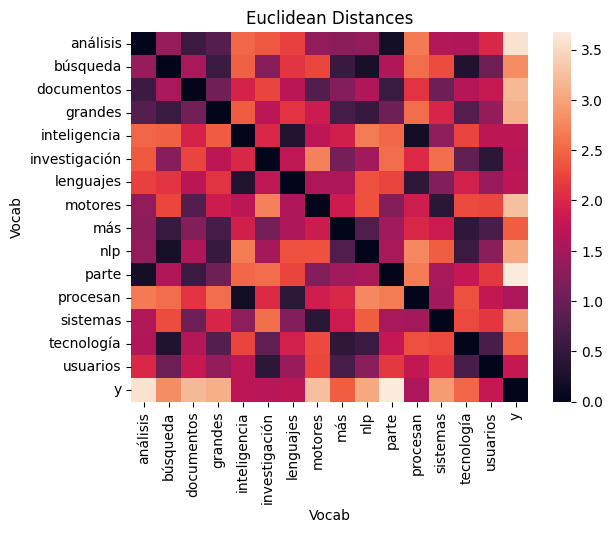

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

xy = np.zeros((word2vec.vocab_size, word2vec.vocab_size))

for i in range(word2vec.vocab_size):
  for j in range(word2vec.vocab_size):
    xy[i][j] = np.linalg.norm(word2vec.W[0][i] - word2vec.W[0][j])
xy[xy<0] = 0
# c = sns.diverging_palette(220, 145, as_cmap=True)
labels = list(word2vec.vocab.keys())
sns.heatmap(xy, xticklabels=labels, yticklabels=labels)
plt.title('Euclidean Distances')
plt.xlabel('Vocab')
plt.ylabel('Vocab')
plt.show()




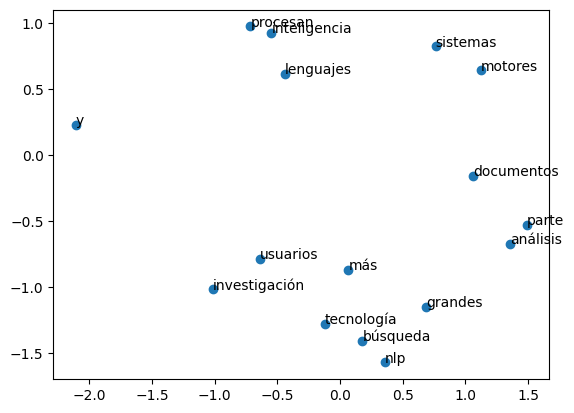

In [ ]:

plt.scatter(word2vec.W[0][:,0], word2vec.W[0][:,1])
# plt.xlim([-1,1])
# plt.ylim([-1,1])
for i, txt in enumerate(word2vec.vocab.keys()):
    plt.annotate(txt, (word2vec.W[0][i,0], word2vec.W[0][i,1]))
plt.show()

## Pregunta 5: GloVe

In [67]:
import numpy as np

class Glove:
    def __init__(self, corpus, min_freq, window_size,embed_size=50, xmax=100, alpha=0.75, learning_rate=0.05, epochs=100):

        tk = Tokenizer()
        self.corpus = tk.tokenize(corpus, min_freq)
        self.vocab = tk.vocab

        self.vocab_size = len(self.vocab)

        self.vocab = { w[0]: i  for i,w in enumerate(sorted(self.vocab.items(), key=lambda t: t[0]))}
        self.vocab_keys = list(self.vocab.keys())

        self.window_size=window_size
        self.X = np.zeros((self.vocab_size, self.vocab_size))
        self.embed_size = embed_size
        self.xmax = xmax
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.epochs = epochs


        # Inicializar vectores de palabras y sesgos
        self.W = np.random.rand(self.vocab_size, self.embed_size) - 0.5
        self.W_tilde = np.random.rand(self.vocab_size, self.embed_size) - 0.5
        self.b = np.random.rand(self.vocab_size) - 0.5
        self.b_tilde = np.random.rand(self.vocab_size) - 0.5

    def build_cooccurrence_matrix(self):
        """
        Construye la matriz de coocurrencia a partir del corpus.
        """
        for text in self.corpus:
            for i in range(len(text)):
                for j in range(max(0, i - self.window_size), min(len(text), i + self.window_size + 1)):
                    if i != j:
                        self.X[self.vocab[text[i]], self.vocab[text[j]]] += 1

    def weighting_function(self, x):
        """
        Función de ponderación f(X_{ij}) según se especifica en la función de costo
        """
        if x < self.xmax:
            return (x / self.xmax) ** self.alpha
        else:
            return 1.0

    def train(self):
        """
        Entrena el modelo GloVe utilizando descenso de gradiente
        """
        self.build_cooccurrence_matrix()
        for epoch in range(self.epochs):
            cost = 0
            for i in range(self.vocab_size):
                for j in range(self.vocab_size):
                    if self.X[i, j] == 0:
                        continue
                    # Calcular el valor de f(X_ij)
                    f_Xij = self.weighting_function(self.X[i, j])

                    # Calcular la diferencia de predicción
                    dot_product = np.dot(self.W[i], self.W_tilde[j])
                    log_Xij = np.log(self.X[i, j])
                    diff = dot_product + self.b[i] + self.b_tilde[j] - log_Xij

                    # Calcular el costo
                    cost += 0.5 * f_Xij * (diff ** 2)

                    # Calcular los gradientes
                    grad_W_i = f_Xij * diff * self.W_tilde[j]
                    grad_W_tilde_j = f_Xij * diff * self.W[i]
                    grad_b_i = f_Xij * diff
                    grad_b_tilde_j = f_Xij * diff

                    # Actualizar parámetros
                    self.W[i] -= self.learning_rate * grad_W_i
                    self.W_tilde[j] -= self.learning_rate * grad_W_tilde_j
                    self.b[i] -= self.learning_rate * grad_b_i
                    self.b_tilde[j] -= self.learning_rate * grad_b_tilde_j

            if (epoch+1) % 100 == 0:
                print(f"Epoch {epoch+1}, Cost: {cost}")

    def get_word_vectors(self):
        """
        Obtiene las representaciones finales de las palabras al combinar W y W_tilde.
        Empíricamente se usa la combinación W + W_tilde
        Retorna la matriz de embeddings de las palabras
        """
        return self.W + self.W_tilde


Ejemplo de uso

In [ ]:
corpus = ["Los lenguajes son una parte crucial de la inteligencia humana e importantes para la comunicación humana. Al investigar la comprensión automática y la generación de lenguajes humanos, el procesamiento del lenguaje natural (NLP) ha sido un subcampo central de la investigación en inteligencia artificial. Desde la década de 1950, la tecnología de NLP ha recibido una atención continua por parte de la investigación y se han logrado grandes avances. Hoy en día, la tecnología NLP se está convirtiendo en una parte indispensable de nuestro negocio y de nuestra vida diaria. Por ejemplo, los motores de búsqueda procesan automáticamente billones de documentos a través de Internet, obtienen conocimientos de ellos y responden a las consultas de los usuarios basándose en su comprensión. Los minoristas en línea procesan millones de descripciones de productos y comentarios de usuarios para recomendar el producto más adecuado según la búsqueda de un usuario. Los sistemas de diálogo automático y los sistemas de traducción son cada vez más utilizados para facilitar la comunicación. En los negocios, los motores de análisis de texto han estado reemplazando el trabajo manual en el análisis de grandes cantidades de documentos para una mejor toma de decisiones."]

glove = Glove(corpus, min_freq=2,window_size=5,embed_size=5, xmax=100, alpha=0.75, learning_rate=0.05, epochs=500)
glove.train()
print(glove.vocab)
print(glove.get_word_vectors())

Epoch 100, Cost: 0.5292971884919482
Epoch 200, Cost: 0.4123417040224817
Epoch 300, Cost: 0.3236821028950152
Epoch 400, Cost: 0.256134155623692
Epoch 500, Cost: 0.20673175811996294
{'análisis': 0, 'búsqueda': 1, 'documentos': 2, 'grandes': 3, 'inteligencia': 4, 'investigación': 5, 'lenguajes': 6, 'motores': 7, 'más': 8, 'nlp': 9, 'parte': 10, 'procesan': 11, 'sistemas': 12, 'tecnología': 13, 'usuarios': 14, 'y': 15}
[[ 0.0245 -0.3935  0.4732 -0.0828 -0.585 ]
 [ 1.44   -0.3849 -0.2326 -0.7553  0.7844]
 [ 0.2538 -0.4658  0.3962  0.0826 -0.0222]
 [-0.3771  0.8221  0.7793  0.5036 -0.0664]
 [ 0.2515 -1.0673 -0.1636 -0.5248  0.1299]
 [-0.7752 -0.6127 -0.8962 -0.2496  0.3862]
 [ 0.9912 -0.7975 -0.095  -0.2191 -0.4377]
 [ 0.6687  0.2911  0.1167 -0.0965 -0.0674]
 [ 1.0477 -0.2092 -0.0767  0.9546  0.0034]
 [-0.9339 -0.2239 -0.2466  0.6058 -0.4696]
 [-1.008  -0.0791 -0.0485  0.7196 -0.0572]
 [ 0.7844 -0.4684  0.252  -0.7148  1.3518]
 [ 0.7365 -0.1184 -0.0388  0.6953 -0.3789]
 [-0.8399  0.214  -0.1

## PRUEBAS

Los corpus usados para las pruebas son reducidos debido al tiempo de entrenamiento requerido para cada uno de los modelos

### Corpus importado

In [ ]:
!pip install mwparserfromhell datasets
from datasets import load_dataset

wikidata = load_dataset("wikipedia", "20220301.en")

Se exporta el corpus para evitar descargar todo el dump de wikipedia
Se obtienen 1000 textos para el entrenamiento

In [ ]:
corpus = [wikidata['train'][i]['text'] for i in range(1000)]
output_file = "corpus_en.txt"

# Escribir el corpus en el archivo
with open(output_file, "w", encoding="utf-8") as f:
    for text in corpus:
        f.write(text + "\n\n" + "-"*10 +"\n\n")  # Añadir doble salto de línea entre textos para separarlos

print(f"Corpus exportado a {output_file}")

In [158]:
def importar_corpus(filename):
    corpus = []
    with open(filename, "r", encoding="utf-8") as f:
        # Leer el archivo completo y dividir en secciones por el delimitador
        texts = f.read().split("\n\n" + "-"*10 + "\n\n")
        # Almacenar cada sección en el array corpus eliminando espacios al inicio y al final
        corpus = [text.strip() for text in texts if text.strip()]
    return corpus

# Usar la función para importar el archivo
input_file = "corpus_en.txt"
corpus = importar_corpus(input_file)

print("Corpus importado con éxito:")

Corpus importado con éxito:


### BrownClustering

El corpus usado para el brownclustering es el mas reducido de todos, pues la complejidad aumenta según el número de posibles combinaciones de clases que se puedan hacer
Si cada palabra inicia con su propia clase individual, este número asciende a
$ {V}\choose{2} $ $ = \frac{V(V-1)}{2}$, lo que es una complejidad casi $O(V²)$

In [ ]:
brown_clustering = BrownClustering(corpus[:2], min_freq=15)
brown_clustering.train(n_k=10)

Counter({('<num>', '<num>'): 29, ('autism', 'autism'): 21, ('autistic', 'people'): 17, ('anarchism', 'anarchism'): 15, ('anarchist', 'anarchism'): 13, ('autistic', 'children'): 13, ('autism', '<num>'): 12, ('children', 'asd'): 12, ('anarchism', 'state'): 11, ('anarchist', 'anarchist'): 10, ('social', 'communication'): 10, ('philosophical', 'anarchism'): 9, ('autistic', 'individuals'): 8, ('<num>', 'autism'): 8, ('anarchist', 'movement'): 7, ('anarchism', 'philosophical'): 7, ('autistic', 'autistic'): 7, ('genetic', 'autism'): 7, ('various', 'anarchist'): 6, ('anarchists', 'anarchists'): 6, ('anarchist', 'social'): 6, ('anarchism', 'anarchist'): 6, ('anarchists', 'state'): 6, ('state', 'anarchists'): 6, ('autism', 'social'): 6, ('children', 'autism'): 6, ('autistic', 'autism'): 6, ('anarchism', 'political'): 5, ('century', 'anarchist'): 5, ('common', 'anarchism'): 5, ('groups', 'anarchists'): 5, ('anarchism', 'many'): 5, ('anarchist', 'state'): 5, ('state', 'anarchist'): 5, ('among', 'a

In [ ]:
brown_clustering.classes

[{'<num>',
  'although',
  'anarchism',
  'century',
  'classical',
  'genetic',
  'groups',
  'individuals',
  'language',
  'movement',
  'syndrome',
  'without'},
 {'age',
  'also',
  'among',
  'anarchist',
  'anarchists',
  'asd',
  'associated',
  'autism',
  'autistic',
  'behavior',
  'children',
  'communication',
  'diagnosis',
  'early',
  'education',
  'evidence',
  'first',
  'include',
  'known',
  'less',
  'many',
  'may',
  'often',
  'one',
  'people',
  'political',
  'social',
  'state',
  'studies',
  'symptoms',
  'tactics',
  'treatment',
  'used',
  'various'},
 {'authority'},
 {'society'},
 {'common'},
 {'philosophical'},
 {'individual'},
 {'free'},
 {'disorders'},
 {'autism.'}]

In [ ]:
word2vec = Word2Vec(corpus[:2], embed_size=2, window_size=5, min_freq=15)
word2vec.train(epochs=1000, learning_rate=0.01, method='skipgram')

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoca:  200
autism [0.9622]
Loss: [0.0385]
----------
Epoca:  400
autism [0.9625]
Loss: [0.0383]
----------
Epoca:  600
autism [0.9626]
Loss: [0.0381]
----------
Epoca:  800
autism [0.9627]
Loss: [0.038]
----------
Epoca:  1000
autism [0.9628]
Loss: [0.0379]
----------
Epoca:  200
syndrome [0.9095]
Loss: [0.0949]
----------
Epoca:  400
syndrome [0.9322]
Loss: [0.0702]
----------
Epoca:  600
syndrome [0.9356]
Loss: [0.0665]
----------
Epoca:  800
syndrome [0.9367]
Loss: [0.0654]
----------
Epoca:  1000
syndrome [0.9372]
Loss: [0.0649]
----------
Epoca:  200
autism [0.9341]
Loss: [0.0682]
----------
Epoca:  400
autism [0.9561]
Loss: [0.0449]
----------
Epoca:  600
autism [0.9607]
Loss: [0.04]
----------
Epoca:  800
autism [0.9625]
Loss: [0.0382]
----------
Epoca:  1000
autism [0.9633]
Loss: [0.0374]
----------
Epoca:  200
social [0.0658]
Loss: [2.7216]
----------
Epoca:  400
social [0.9409]
Loss: [0.061]
----------
Epoca:

<ipython-input-189-083c6dd90758>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab10", num_classes)  # Cambia "tab10" si necesitas más de 10 colores


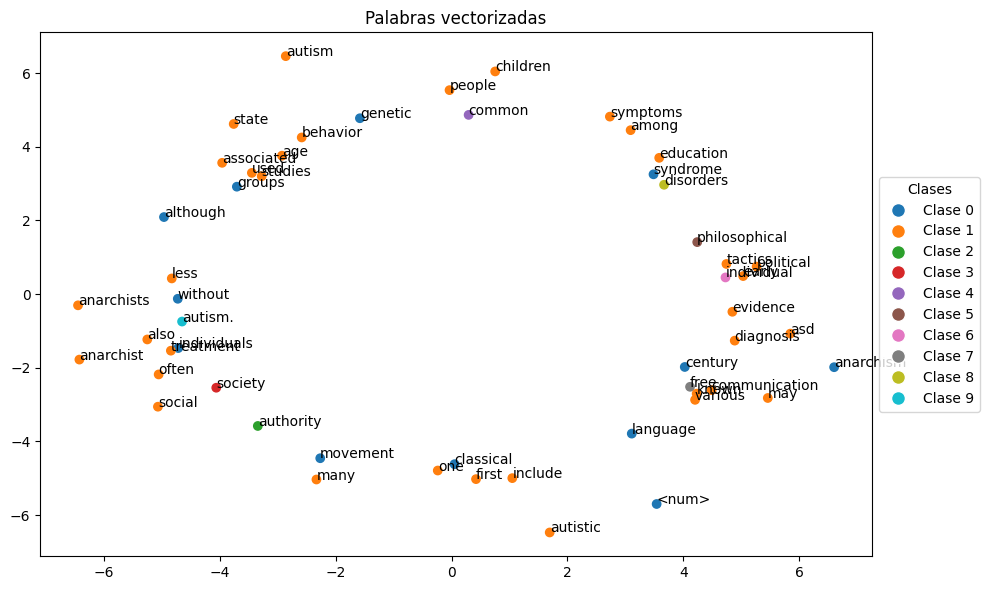

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# Generar un color único para cada conjunto en brown_clustering.classes
num_classes = len(brown_clustering.classes)
cmap = cm.get_cmap("tab10", num_classes)  # Cambia "tab10" si necesitas más de 10 colores
class_colors = {i: cmap(i) for i in range(num_classes)}

# Crear un diccionario para asociar cada palabra a un color basado en su conjunto
word_colors = {}
for i, class_set in enumerate(brown_clustering.classes):
    color = class_colors[i]
    for elem in class_set:
        word_colors[elem] = color

# Crear una lista de colores para cada palabra en el vocabulario de word2vec
colors = [word_colors.get(txt, "grey") for txt in word2vec.vocab.keys()]

# Dibujar el gráfico de dispersión con los colores de clase
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.scatter(word2vec.W[0][:, 0], word2vec.W[0][:, 1], c=colors)

# Opcional: establecer límites para el gráfico
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])

# Añadir anotaciones de las palabras
for i, txt in enumerate(word2vec.vocab.keys()):
    plt.annotate(txt, (word2vec.W[0][i, 0], word2vec.W[0][i, 1]))

# Crear leyenda con una muestra de cada clase
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=class_colors[i], markersize=10, label=f'Clase {i}')
                   for i in range(num_classes)]
plt.legend(handles=legend_elements, title="Clases", loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.title("Palabras vectorizadas")
plt.tight_layout()  # Ajustar el diseño para que la leyenda no se superponga
plt.show()


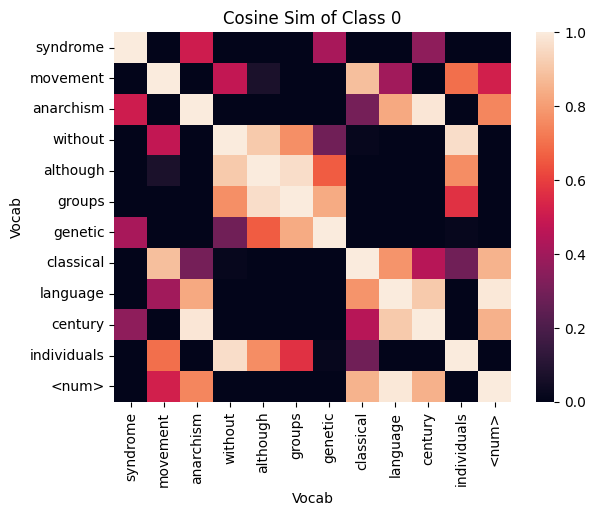

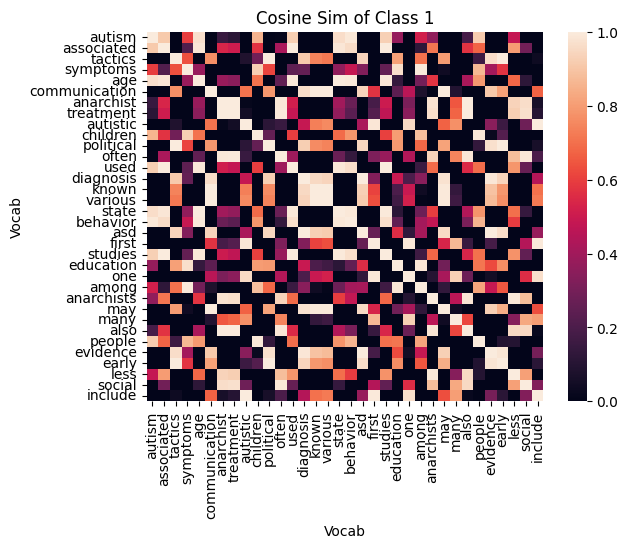

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)



for id,c in enumerate(brown_clustering.classes):
  if len(c) == 1:
    continue
  xy = np.zeros((len(c), len(c)))
  for i in range(len(c)):
    for j in range(len(c)):
      v_i = word2vec.W[0][word2vec.get_word_index(list(c)[i])]
      v_j = word2vec.W[0][word2vec.get_word_index(list(c)[j])]
      xy[i][j] = np.dot(v_i, v_j)/(np.linalg.norm(v_i)*np.linalg.norm(v_j))
      # xy[i][j] = np.linalg.norm(v_i - v_j)

  xy[xy<0] = 0
  # c = sns.diverging_palette(220, 145, as_cmap=True)
  labels = [word for word in list(c)]
  sns.heatmap(xy, xticklabels=labels, yticklabels=labels)
  plt.title(f'Cosine Sim of Class {id}')
  plt.xlabel('Vocab')
  plt.ylabel('Vocab')
  plt.show()

In [ ]:
glove = Glove(corpus[:2], min_freq=15,window_size=5,embed_size=5, xmax=100, alpha=0.75, learning_rate=0.05, epochs=1000)
glove.train()

Epoch 100, Cost: 19.620270446185184
Epoch 200, Cost: 17.764828725204364
Epoch 300, Cost: 17.366268628075428
Epoch 400, Cost: 17.235330059028936
Epoch 500, Cost: 17.185372941737125
Epoch 600, Cost: 17.161693520588674
Epoch 700, Cost: 17.145976360443488
Epoch 800, Cost: 17.131766802632534
Epoch 900, Cost: 17.116247399785372
Epoch 1000, Cost: 17.09788080915647


<ipython-input-188-1eeb9790fc50>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab10", num_classes)  # Cambia "tab10" si necesitas más de 10 colores


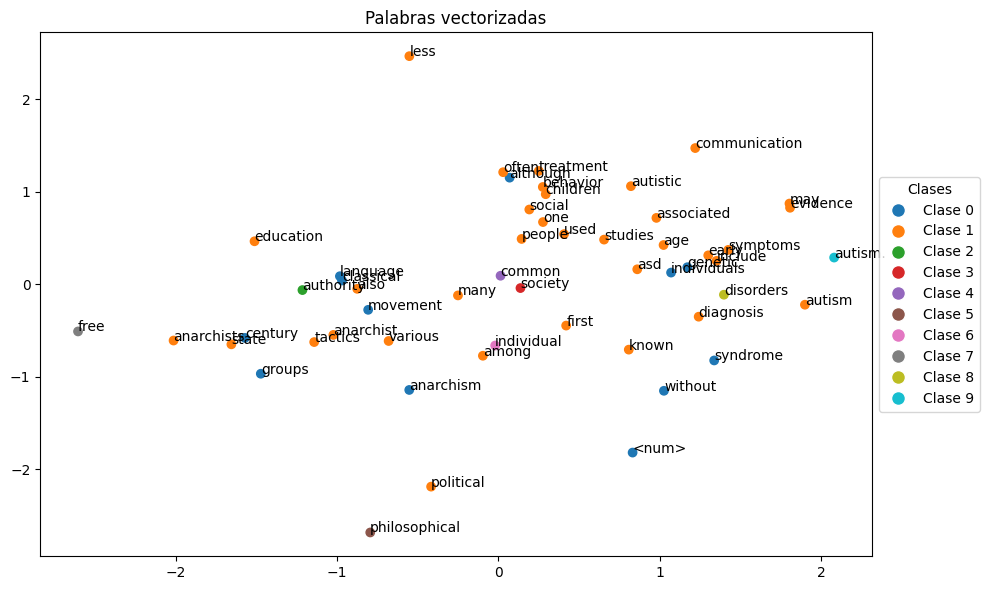

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# Generar un color único para cada conjunto en brown_clustering.classes
num_classes = len(brown_clustering.classes)
cmap = cm.get_cmap("tab10", num_classes)  # Cambia "tab10" si necesitas más de 10 colores
class_colors = {i: cmap(i) for i in range(num_classes)}

# Crear un diccionario para asociar cada palabra a un color basado en su conjunto
word_colors = {}
for i, class_set in enumerate(brown_clustering.classes):
    color = class_colors[i]
    for elem in class_set:
        word_colors[elem] = color

# Crear una lista de colores para cada palabra en el vocabulario de word2vec
colors = [word_colors.get(txt, "grey") for txt in glove.vocab.keys()]

# Dibujar el gráfico de dispersión con los colores de clase
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.scatter(glove.get_word_vectors()[:, 0], glove.get_word_vectors()[:, 1], c=colors)

# Opcional: establecer límites para el gráfico
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])

# Añadir anotaciones de las palabras
for i, txt in enumerate(glove.vocab.keys()):
    plt.annotate(txt, (glove.get_word_vectors()[i, 0], glove.get_word_vectors()[i, 1]))

# Crear leyenda con una muestra de cada clase
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=class_colors[i], markersize=10, label=f'Clase {i}')
                   for i in range(num_classes)]
plt.legend(handles=legend_elements, title="Clases", loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.title("Palabras vectorizadas")
plt.tight_layout()  # Ajustar el diseño para que la leyenda no se superponga
plt.show()


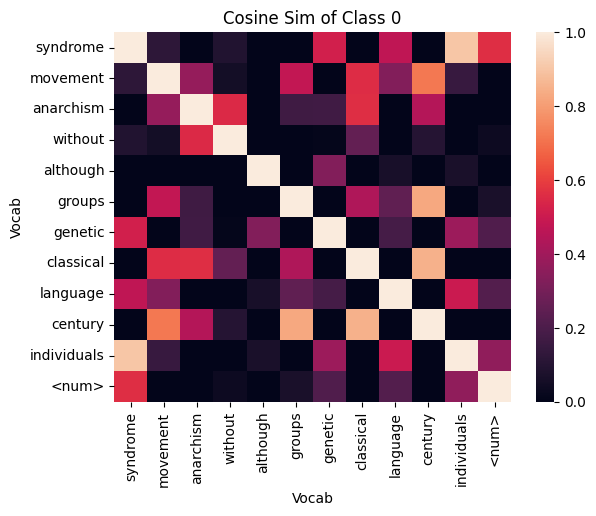

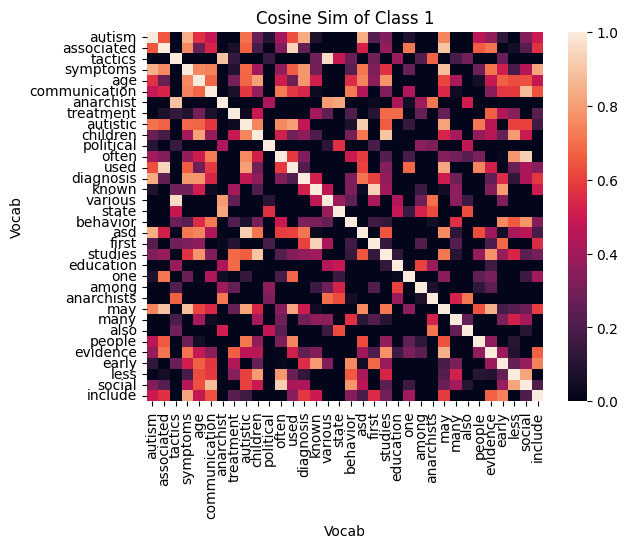

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)



for id,c in enumerate(brown_clustering.classes):
  if len(c) == 1:
    continue
  xy = np.zeros((len(c), len(c)))
  for i in range(len(c)):
    for j in range(len(c)):
      v_i = glove.get_word_vectors()[word2vec.get_word_index(list(c)[i])]
      v_j = glove.get_word_vectors()[word2vec.get_word_index(list(c)[j])]
      xy[i][j] = np.dot(v_i, v_j)/(np.linalg.norm(v_i)*np.linalg.norm(v_j))
      # xy[i][j] = np.linalg.norm(v_i - v_j)

  xy[xy<0] = 0
  # c = sns.diverging_palette(220, 145, as_cmap=True)
  labels = [word for word in list(c)]
  sns.heatmap(xy, xticklabels=labels, yticklabels=labels)
  plt.title(f'Cosine Sim of Class {id}')
  plt.xlabel('Vocab')
  plt.ylabel('Vocab')
  plt.show()

### LSA

Se realiza la descomposición SVD de la matriz de documentos del corpus y se imprimen heatmaps que indican la similaridad entre cada uno de ellos (termino a término, documento a documento y término a documento)

Reduciendo el número de valores singulares a 10, se obtienen los resultados siguientes:

[Counter({'anarchism': 111, 'anarchist': 79, 'anarchists': 69, '<num>': 52, 'state': 47, 'political': 25, 'movement': 22, 'society': 20, 'free': 19, 'authority': 18, 'century': 18, 'also': 17, 'many': 16, 'among': 16, 'various': 15, 'classical': 15, 'tactics': 15, 'currents': 15, 'philosophical': 15, 'groups': 14, 'schools': 13, 'movements': 13, 'social': 13, 'contemporary': 13, 'education': 13, 'socialist': 12, 'thought': 12, 'world': 12, 'autonomy': 12, 'individual': 12, 'means': 12, 'libertarian': 11, 'first': 11, 'within': 11, 'revolution': 11, 'principles': 11, 'forms': 10, 'without': 10, 'workers': 10, 'war': 10, 'international': 10, 'violence': 10, 'capitalism': 10, 'revolutionary': 9, 'criticism': 9, 'became': 9, 'theory': 9, 'action': 9, 'states': 8, 'although': 8, 'significant': 8, 'part': 8, 'human': 8, 'common': 8, 'major': 8, 'will': 8, 'known': 8, 'small': 8, 'love': 8, 'ideal': 7, 'two': 7, 'new': 7, 'established': 7, 'according': 7, '<acronym>': 7, 'class': 7, 'governme

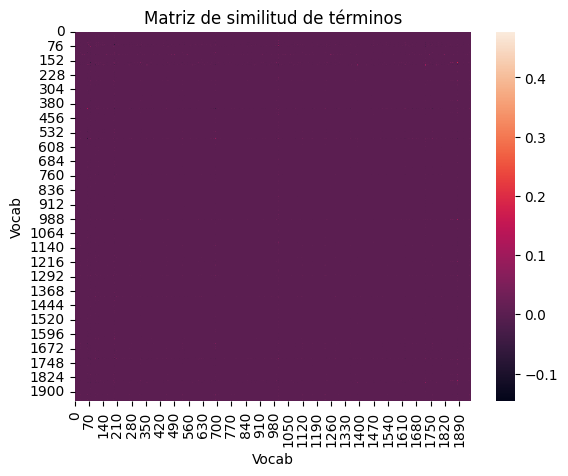

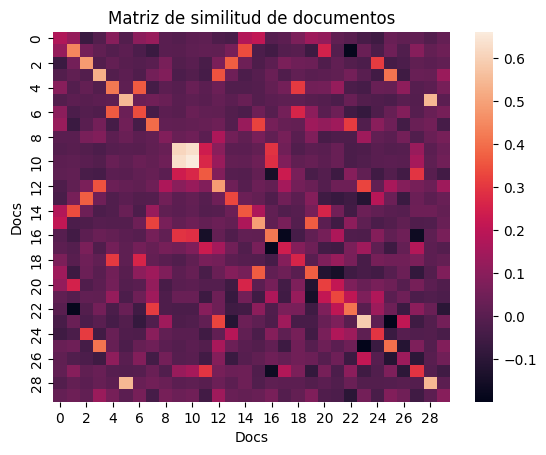

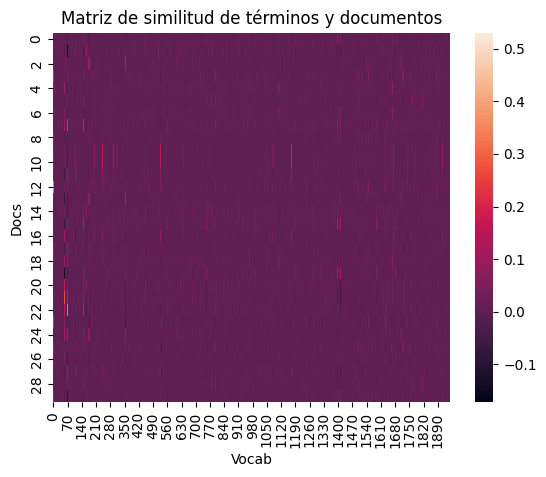

In [163]:
lsa = LSA(corpus[:30], min_freq=10)
lsa.train(k=10)

sns.heatmap(lsa.word_sim())
plt.title("Matriz de similitud de términos")
plt.xlabel('Vocab')
plt.ylabel('Vocab')
plt.show()

sns.heatmap(lsa.doc_sim())
plt.title("Matriz de similitud de documentos")
plt.xlabel('Docs')
plt.ylabel('Docs')
plt.show()

sns.heatmap(lsa.word_doc_sim())
plt.title("Matriz de similitud de términos y documentos")
plt.xlabel('Vocab')
plt.ylabel('Docs')
plt.show()

### Word2Vec

Se realiza el entrenamiento con los primeros 40 artículos de wikipedia, siendo que a medida que se aumenta el número de palabras en el corpus, se aumenta exponencialmente el número de nodos en la red neuronal, lo que aumenta la complejidad de la actualización de los pesos para entrenar respecto a todas las palabras seleccionadas

In [116]:
word2vec = Word2Vec(corpus[:40], embed_size=10, window_size=10, min_freq=10)
word2vec.train(epochs=10, learning_rate=0.05, method='cbow')

{'<acronym>': 0, '<num>': 1, 'abandoned': 2, 'abc': 3, 'ability': 4, 'able': 5, 'abraham': 6, 'academic': 7, 'academy': 8, 'according': 9, 'account': 10, 'achieve': 11, 'achievement': 12, 'achilles': 13, 'across': 14, 'act': 15, 'acting': 16, 'action': 17, 'actions': 18, 'active': 19, 'activists': 20, 'activities': 21, 'activity': 22, 'actor': 23, 'actors': 24, 'actress': 25, 'acts': 26, 'actual': 27, 'actually': 28, 'ad': 29, 'added': 30, 'addition': 31, 'additional': 32, 'address': 33, 'admetus': 34, 'admitted': 35, 'adopted': 36, 'adults': 37, 'affect': 38, 'africa': 39, 'african': 40, 'agamemnon': 41, 'agassi': 42, 'agassis': 43, 'age': 44, 'ages': 45, 'agreed': 46, 'agricultural': 47, 'agriculture': 48, 'aid': 49, 'air': 50, 'alabama': 51, 'alabamas': 52, 'albedo': 53, 'album': 54, 'alchemical': 55, 'alchemists': 56, 'alchemy': 57, 'alexander': 58, 'algeria': 59, 'algerian': 60, 'algerians': 61, 'algerias': 62, 'algiers': 63, 'alien': 64, 'aliens': 65, 'allow': 66, 'allowed': 67, 

Training progress for text 29: 100%|██████████| 3536/3536 [00:37<00:00, 94.28it/s]


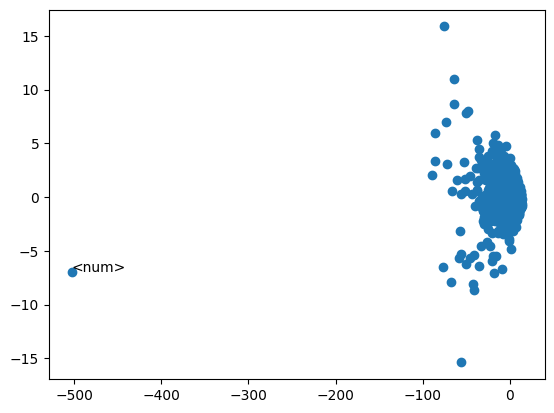

In [174]:
from sklearn.decomposition import PCA
X = np.array(word2vec.W[0])
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1])
plt.annotate("<num>", (Y[word2vec.vocab["<num>"], 0], Y[word2vec.vocab["<num>"], 1]))
plt.show()

Análisis de la analogía: Father - Man + Female -> Mother
Se observa que no se cumple la analogía, lo que puede deberse a falta de casos de entrenamiento en los que se use la palabra man o female en el mismo contexto que father o mother

In [166]:
words = [word2vec.W[0][i]/np.linalg.norm(word2vec.W[0][i]) for i in range(word2vec.vocab_size)]
w1 = words[word2vec.get_word_index("father")] - words[word2vec.get_word_index("man")] + words[word2vec.get_word_index("female")]
for i in np.argpartition(np.dot(words, w1), -10)[-10:]:
  print(word2vec.get_word_from_index(i))

zeus
relationships
policy
battle
goddess
experiences
personal
originally
female
powers


A primera instancia se nota que el modelo skipgram es mucho mas lentro que CBOW, debido a que para cada par de (context, target), skipgram usa el target un número de `window_size` veces para predecir una a una las palabras del contexto, mientras que CBOW usa una generalización del contexto (promedio)

In [175]:
word2vec_sk = Word2Vec(corpus[:30], embed_size=10, window_size=5, min_freq=10)
word2vec_sk.train(epochs=10, learning_rate=0.05, method='skipgram')

{'<acronym>': 0, '<num>': 1, 'abandoned': 2, 'abc': 3, 'ability': 4, 'able': 5, 'abraham': 6, 'academic': 7, 'academy': 8, 'acceptance': 9, 'accepted': 10, 'access': 11, 'according': 12, 'account': 13, 'accounts': 14, 'achieve': 15, 'achievement': 16, 'achilles': 17, 'across': 18, 'act': 19, 'acting': 20, 'action': 21, 'actions': 22, 'active': 23, 'activists': 24, 'activities': 25, 'activity': 26, 'actor': 27, 'actors': 28, 'actress': 29, 'acts': 30, 'actual': 31, 'actually': 32, 'ad': 33, 'added': 34, 'addition': 35, 'additional': 36, 'address': 37, 'admetus': 38, 'admitted': 39, 'adopted': 40, 'adults': 41, 'advocates': 42, 'affect': 43, 'affected': 44, 'affects': 45, 'africa': 46, 'african': 47, 'agamemnon': 48, 'agassi': 49, 'agassis': 50, 'age': 51, 'ages': 52, 'agree': 53, 'agreed': 54, 'agricultural': 55, 'agriculture': 56, 'aid': 57, 'aims': 58, 'air': 59, 'ajax': 60, 'alabama': 61, 'alabamas': 62, 'alain': 63, 'albedo': 64, 'albedos': 65, 'album': 66, 'alchemical': 67, 'alchem

Training progress for text 29: 100%|██████████| 3754/3754 [01:41<00:00, 37.09it/s]


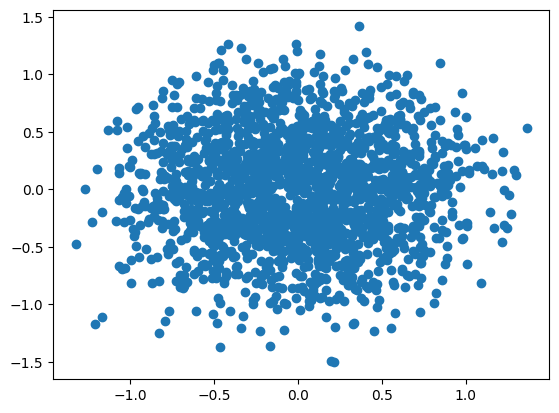

In [177]:
from sklearn.decomposition import PCA
X = np.array(word2vec_sk.W[0])
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

### GloVe

In [68]:
glove = Glove(corpus[:30], min_freq=15,window_size=10,embed_size=5, xmax=100, alpha=0.75, learning_rate=0.05, epochs=500)
glove.train()

Epoch 100, Cost: 3837.460662556303
Epoch 200, Cost: 3799.1149633110604
Epoch 300, Cost: 3779.7097166294207
Epoch 400, Cost: 3768.4246448487006
Epoch 500, Cost: 3761.9207684399075


Análisis de la analogía: Father - Man + Female -> Mother
Se observa que no se cumple la analogía, lo que puede deberse a falta de casos de entrenamiento en los que se use la palabra man o female en el mismo contexto que father o mother

In [169]:
w1 = glove.get_word_vectors()[glove.vocab["father"]] - glove.get_word_vectors()[glove.vocab["man"]] + glove.get_word_vectors()[glove.vocab["female"]]
words = [glove.get_word_vectors()[i]/np.linalg.norm(glove.get_word_vectors()[i]) for i in range(glove.vocab_size)]
for i in np.argpartition(np.dot(words, w1), -10)[-10:]:
  print(glove.vocab_keys[i])

force
belief
worked
workers
mass
opposed
primarily
fall
view
father
